In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
plt.rcParams['figure.figsize'] = (16, 4)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import pmdarima as pm

from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer

from sklearn.linear_model import LinearRegression

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)   
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [2]:
#read files from previous jupyter

df_area_1 = pd.read_pickle('data/clean/df_area_1.pickle') #(12192, 1)
df_area_3 = pd.read_pickle('data/clean/df_area_3.pickle') #(15480, 1)
df_area_3 = pd.read_pickle('data/clean/df_area_3.pickle') #(17160, 1)

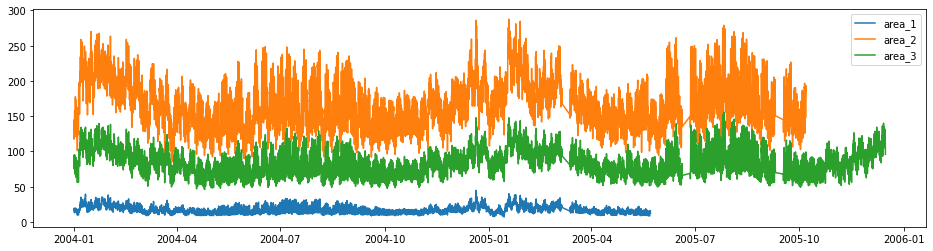

In [3]:
#plot
plt.plot(df_area_1, label='area_1')
plt.plot(df_area_3, label='area_3')
plt.plot(df_area_3, label='area_3')
plt.legend();

In [18]:
#area_3

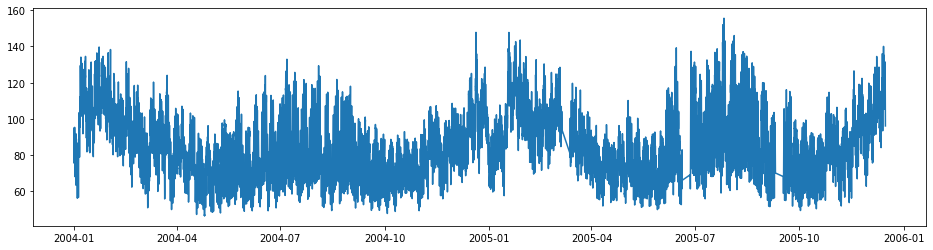

In [3]:
plt.plot(df_area_3, label='area_3')

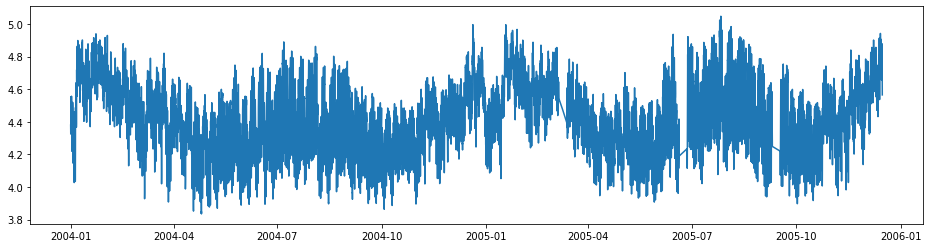

In [4]:
df_area_3_log = np.log(df_area_3)
plt.plot(df_area_3_log, label='area_3')

In [5]:
df_area_3_log_train = df_area_3_log[:-24*7]
df_area_3_log_test = df_area_3_log[-24*7:]

df_area_3_train = df_area_3[:-24*7]
df_area_3_test = df_area_3[-24*7:]

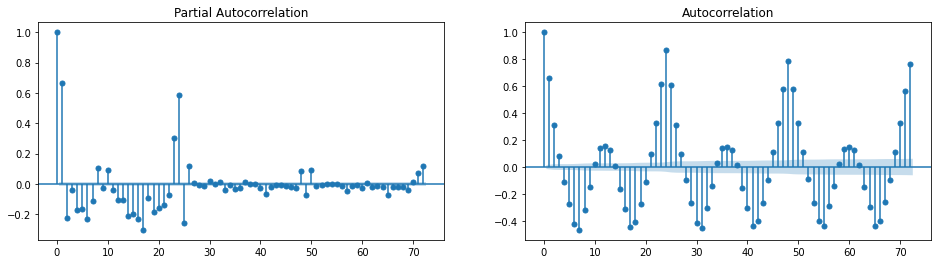

In [6]:
fig, ax = plt.subplots(1,2)
plot_pacf(df_area_3_log_train.diff().dropna(), alpha=.05, lags=72, ax=ax[0], method='ols')  
plot_acf(df_area_3_log_train.diff().dropna(), alpha=.05, lags=72, ax=ax[1])  
plt.show()

In [8]:
#small train set to run faster
df_area_3_train_s = df_area_3[-24*15:-24*7]
df_area_3_test_s = df_area_3[-24*7:]

df_area_3_train_s.shape


(192, 1)

In [10]:
sarimax_a3 = pm.AutoARIMA(trace=True, supress_warnings=True, m=24)
sarimax_a3.fit(df_area_3_train_s)

#sarimax_a1_forecast = sarimax_a1.predict(24)
# mean_absolute_error(np.exp(sarimax_a1_forecast),np.exp(df_area_1_log_test))

Performing stepwise search to minimize aic


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=inf, Time=5.09 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=1225.233, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=1084.839, Time=0.74 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=1115.551, Time=1.04 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=1223.296, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[24] intercept   : AIC=1192.613, Time=0.07 sec
 ARIMA(1,1,0)(2,0,0)[24] intercept   : AIC=1086.838, Time=3.91 sec
 ARIMA(1,1,0)(1,0,1)[24] intercept   : AIC=1086.837, Time=1.76 sec
 ARIMA(1,1,0)(0,0,1)[24] intercept   : AIC=1113.112, Time=0.65 sec
 ARIMA(1,1,0)(2,0,1)[24] intercept   : AIC=inf, Time=17.51 sec
 ARIMA(0,1,0)(1,0,0)[24] intercept   : AIC=1089.808, Time=0.49 sec
 ARIMA(2,1,0)(1,0,0)[24] intercept   : AIC=1086.645, Time=1.12 sec
 ARIMA(1,1,1)(1,0,0)[24] intercept   : AIC=1086.692, Time=1.49 sec
 ARIMA(0,1,1)(1,0,0)[24] intercept   : AIC=1084.747, Time=0.70 sec
 ARIMA(0,1,1)(0,0,0)[24] intercept   : AIC=1196.315, Time=0.09 sec
 ARI

/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(1,1,2)(1,0,0)[24] intercept   : AIC=inf, Time=3.75 sec
 ARIMA(0,1,1)(1,0,0)[24]             : AIC=1082.749, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[24]             : AIC=1194.348, Time=0.04 sec
 ARIMA(0,1,1)(2,0,0)[24]             : AIC=1084.737, Time=1.46 sec
 ARIMA(0,1,1)(1,0,1)[24]             : AIC=1084.730, Time=0.94 sec
 ARIMA(0,1,1)(0,0,1)[24]             : AIC=1113.553, Time=0.55 sec
 ARIMA(0,1,1)(2,0,1)[24]             : AIC=inf, Time=9.26 sec
 ARIMA(0,1,0)(1,0,0)[24]             : AIC=1087.811, Time=0.16 sec
 ARIMA(1,1,1)(1,0,0)[24]             : AIC=1084.694, Time=0.65 sec
 ARIMA(0,1,2)(1,0,0)[24]             : AIC=1084.680, Time=0.35 sec
 ARIMA(1,1,0)(1,0,0)[24]             : AIC=1082.841, Time=0.69 sec
 ARIMA(1,1,2)(1,0,0)[24]             : AIC=inf, Time=2.92 sec

Best model:  ARIMA(0,1,1)(1,0,0)[24]          
Total fit time: 79.400 seconds


AutoARIMA(m=24, trace=True)

In [11]:
#small train set to run faster
df_area_3_train_log_s = df_area_3_log[-24*15:-24*7]
df_area_3_test_log_s = df_area_3_log[-24*7:]

sarimax_log_a3 = pm.AutoARIMA(trace=True, supress_warnings=True, m=24)
sarimax_log_a3.fit(df_area_3_train_log_s)

Performing stepwise search to minimize aic


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=inf, Time=4.74 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=-548.886, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=-682.280, Time=2.17 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=-657.296, Time=2.16 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=-550.812, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[24] intercept   : AIC=-582.665, Time=0.08 sec
 ARIMA(1,1,0)(2,0,0)[24] intercept   : AIC=-680.336, Time=11.50 sec
 ARIMA(1,1,0)(1,0,1)[24] intercept   : AIC=-680.379, Time=4.90 sec
 ARIMA(1,1,0)(0,0,1)[24] intercept   : AIC=-659.454, Time=1.68 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(1,1,0)(2,0,1)[24] intercept   : AIC=-681.747, Time=18.05 sec
 ARIMA(0,1,0)(1,0,0)[24] intercept   : AIC=-673.791, Time=1.21 sec
 ARIMA(2,1,0)(1,0,0)[24] intercept   : AIC=-680.700, Time=2.56 sec
 ARIMA(1,1,1)(1,0,0)[24] intercept   : AIC=-680.680, Time=3.81 sec
 ARIMA(0,1,1)(1,0,0)[24] intercept   : AIC=-682.644, Time=1.72 sec
 ARIMA(0,1,1)(0,0,0)[24] intercept   : AIC=-579.825, Time=0.12 sec
 ARIMA(0,1,1)(2,0,0)[24] intercept   : AIC=-680.661, Time=11.13 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(0,1,1)(1,0,1)[24] intercept   : AIC=-680.673, Time=4.18 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(0,1,1)(2,0,1)[24] intercept   : AIC=-683.845, Time=16.25 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(0,1,1)(2,0,2)[24] intercept   : AIC=inf, Time=23.95 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(0,1,1)(1,0,2)[24] intercept   : AIC=inf, Time=19.23 sec
 ARIMA(0,1,0)(2,0,1)[24] intercept   : AIC=-675.358, Time=9.43 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(1,1,1)(2,0,1)[24] intercept   : AIC=-681.345, Time=18.50 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(0,1,2)(2,0,1)[24] intercept   : AIC=-680.628, Time=16.84 sec
 ARIMA(1,1,2)(2,0,1)[24] intercept   : AIC=-650.442, Time=14.69 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(0,1,1)(2,0,1)[24]             : AIC=inf, Time=12.19 sec

Best model:  ARIMA(0,1,1)(2,0,1)[24] intercept
Total fit time: 201.259 seconds


AutoARIMA(m=24, trace=True)

In [15]:
#trying with box-cox transformation
sarimax_pipeline_a3 = Pipeline([
    ('boxcox', BoxCoxEndogTransformer(lmbda2=1e-6)),
    ('arima', pm.AutoARIMA(trace=True,
                           suppress_warnings=True,
                           m=24
                          )
    )
])

sarimax_pipeline_a3.fit(df_area_3_train_s)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=inf, Time=4.53 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=793.422, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=654.015, Time=0.62 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=683.590, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=791.488, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[24] intercept   : AIC=760.410, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[24] intercept   : AIC=656.013, Time=2.72 sec
 ARIMA(1,1,0)(1,0,1)[24] intercept   : AIC=656.012, Time=1.43 sec
 ARIMA(1,1,0)(0,0,1)[24] intercept   : AIC=681.142, Time=0.42 sec
 ARIMA(1,1,0)(2,0,1)[24] intercept   : AIC=inf, Time=10.76 sec
 ARIMA(0,1,0)(1,0,0)[24] intercept   : AIC=659.785, Time=0.39 sec
 ARIMA(2,1,0)(1,0,0)[24] intercept   : AIC=655.778, Time=0.69 sec
 ARIMA(1,1,1)(1,0,0)[24] intercept   : AIC=655.825, Time=0.82 sec
 ARIMA(0,1,1)(1,0,0)[24] intercept   : AIC=653.880, Time=0.48 sec
 ARIMA(0,1,1)(0,0,0)[24] intercept   : A

Pipeline(steps=[('boxcox', BoxCoxEndogTransformer(lmbda2=1e-06)),
                ('arima', AutoARIMA(m=24, suppress_warnings=True, trace=True))])

In [18]:
pred_a3 = sarimax_pipeline_a3.predict(24*7)

mean_absolute_error(sarimax_pipeline_a3.predict(24*7),df_area_3_test_s)

11.91271051011257

In [19]:
pred_a3.shape

(168,)

In [22]:
prediction3 = pd.Series(pred_a3, index=df_area_3_test_s.index)

In [23]:
prediction3

date
2005-12-09 00:00:00    102.746347
2005-12-09 01:00:00    101.903382
2005-12-09 02:00:00    102.604470
2005-12-09 03:00:00     99.445747
2005-12-09 04:00:00    102.834744
                          ...    
2005-12-15 19:00:00     99.164567
2005-12-15 20:00:00     98.906584
2005-12-15 21:00:00     98.455403
2005-12-15 22:00:00     97.528717
2005-12-15 23:00:00     97.180874
Length: 168, dtype: float64

In [24]:
prediction3.to_csv('data/pred3.csv')

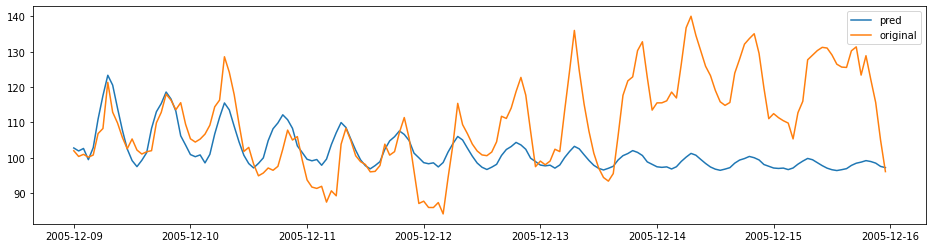

In [25]:
plt.plot(prediction3, label='pred')
plt.plot(df_area_3_test_s, label='original')
plt.legend();

In [27]:
sarimax_pipeline_a3_full = Pipeline([
    ('boxcox', BoxCoxEndogTransformer(lmbda2=1e-6)),
    ('arima', pm.AutoARIMA(trace=True,
                           suppress_warnings=True,
                           m=24
                          )
    )
])

sarimax_pipeline_a3_full.fit(df_area_3_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=-62232.703, Time=292.71 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=-33307.840, Time=5.16 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=inf, Time=109.49 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=-51767.890, Time=86.58 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=-33309.839, Time=1.27 sec
 ARIMA(2,1,2)(0,0,1)[24] intercept   : AIC=-53534.048, Time=266.33 sec
 ARIMA(2,1,2)(1,0,0)[24] intercept   : AIC=-60855.252, Time=294.74 sec
 ARIMA(2,1,2)(2,0,1)[24] intercept   : AIC=-62655.540, Time=997.43 sec
 ARIMA(2,1,2)(2,0,0)[24] intercept   : AIC=-61384.672, Time=924.09 sec


KeyboardInterrupt: 

In [32]:
def build_target(series_, number_of_periods_ahead):
    """ 
    takes a series, turned it into a dataframe, and adds a new column called target
    This column is the input series, lagged number_of_periods_ahead into the future
    """
    
    # make a copy 
    series_ = series_.copy()
    series_.name = 'observed_values'
    
    # make a dataframe from the series
    df_ = pd.DataFrame(series_)
    
    # the target column will be the input series, lagged into the future
    df_['target'] = series_.shift(-number_of_periods_ahead)
    return df_


def build_some_features(df_, num_periods_lagged): 
    """
    Builds some features by calculating differences between periods  
    """
    # make a copy 
    df_ = df_.copy()
        
    # for a few values, get the lags  
    for i in range(1, num_periods_lagged+1):
        # make a new feature, with the lags in the observed values column
        df_['lagged_%s' % str(i)] = df_['observed_values'].shift(i)
        
    return df_

def separate_last_day(df_):
    
    """
    takes a dataset which has the target and features built 
    and separates it into the last day
    """
    # take the last period 
    last_period = df_.iloc[-1]
    
    # the last period is now a series, so it's name will be the timestamp
    training_data = df_.loc[df_.index < last_period.name]

    return last_period, training_data

def separate_train_and_test_set(last_period_, training_data_, target='target'): 
    
    """ 
    separates training and test set (clue was in the name, really... )
    Ok, we were lazy and left the target hardcoded as 'target'. Shame on us. 
    """
    
    # anything that isn't a target is a feature 
    features = [feature for feature in training_data_.columns if feature != target]
    
    # adding a sneaky little dropna to avoid the missing data problem above 
    X_train = training_data_.dropna()[features]
    y_train = training_data_.dropna()[target]
    
    X_last_period = last_period_[features]
    
    return X_train, y_train, X_last_period


def prepare_for_prediction(series_, number_of_periods_ahead, num_periods_lagged):
    
    """ 
    Wrapper to go from the original series to X_train, y_train, X_last_period 
    
    """
    
    # build the target 
    data_with_target = build_target(series_, 
                                    number_of_periods_ahead)
    
    # build the features 
    data_with_target_and_features = build_some_features(data_with_target, 
                                                        num_periods_lagged=num_periods_lagged)
    # separate train and test data 
    last_period, training_data = separate_last_day(data_with_target_and_features)

    # separate X_train, y_train, and X_test 
    X_train, y_train, X_last_period = separate_train_and_test_set(last_period, 
                                                           training_data, 
                                                           target='target')
    
    # return ALL OF THE THINGS! (well, actually just the ones we need)
    return X_train, y_train, X_last_period 


def predict_period_n(series_, model, number_of_periods_ahead, num_periods_lagged): 
    
        X_train, y_train, X_last_period = prepare_for_prediction(series_, 
                                                             number_of_periods_ahead, 
                                                             num_periods_lagged)
        
        model.fit(X_train, y_train)
        return model.predict(X_last_period.values.reshape(1, -1))

def predict_n_periods(series_, n_periods, model, num_periods_lagged): 
    predictions = []

    for period_ahead in range(1, n_periods+1):
        pred = predict_period_n(series_=series_, 
                                model=model, 
                                number_of_periods_ahead=period_ahead, 
                                num_periods_lagged=num_periods_lagged)
        
        predictions.append(pred[0])
        
    return predictions

In [38]:
df_area_3_train = df_area_3_train.rename(mapper = {"value": 'observed_values'}, axis = "columns")
df_area_3_test = df_area_3_test.rename(mapper = {"value": 'observed_values'}, axis = "columns")

predictions3 = predict_n_periods(series_=df_area_3_train, 
                  n_periods=len(df_area_3_test), 
                  model=LinearRegression(), 
                  num_periods_lagged=24)

In [39]:
len(predictions3)

168

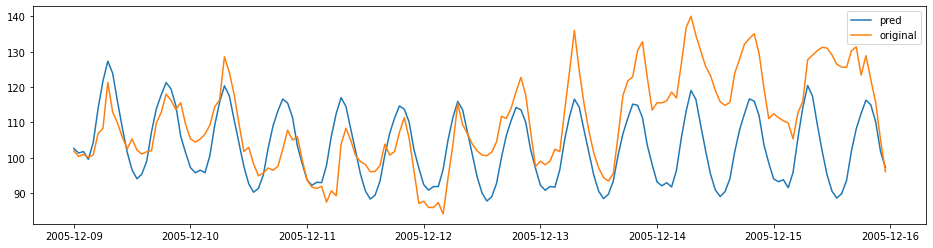

In [40]:
plt.plot(pd.Series(predictions3, index=df_area_3_test.index), label='pred')
plt.plot(df_area_3_test, label='original')
plt.legend();

In [41]:
mean_absolute_error(predictions3,df_area_3_test)

10.650665689257172